In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/07 Classification Models/Iris.csv')

In [99]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [100]:
#Visualization of Overall Dataset

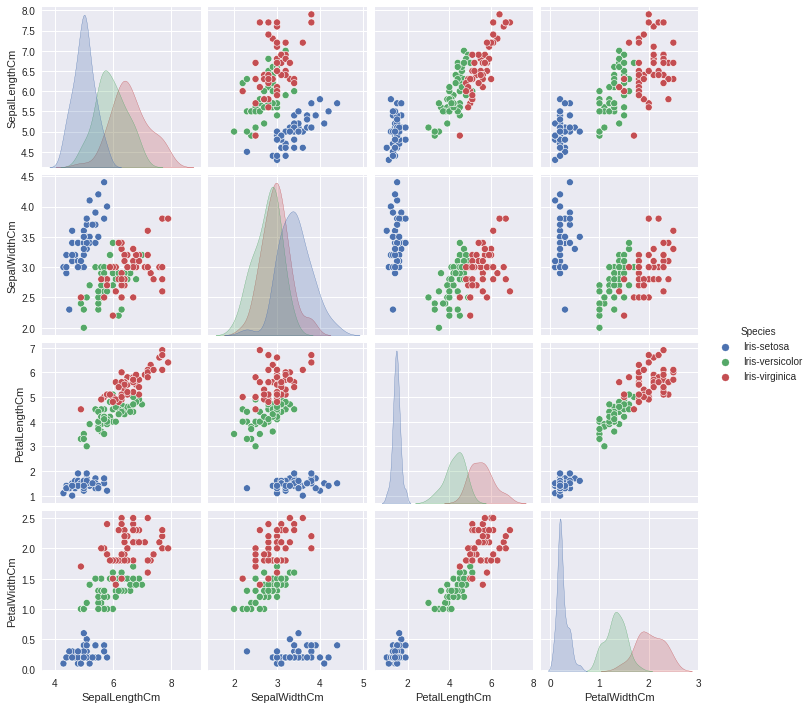

In [101]:
sns.pairplot(df, hue='Species')

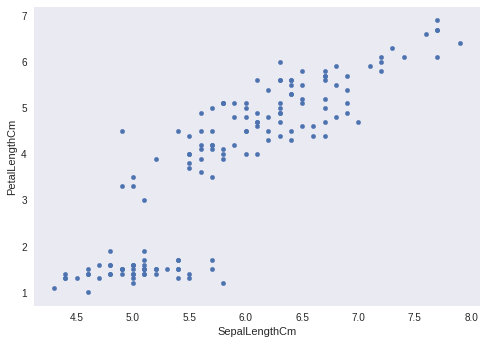

In [102]:
df.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm')
plt.grid()

Text(0, 0.5, '# of Flowers')

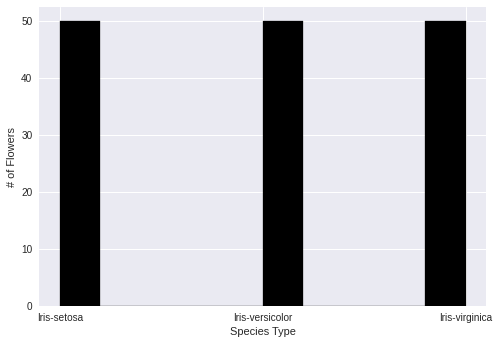

In [103]:
plt.style.use('seaborn')
df['Species'].hist(edgecolor='black', color='black')
plt.xlabel("Species Type")
plt.ylabel('# of Flowers')

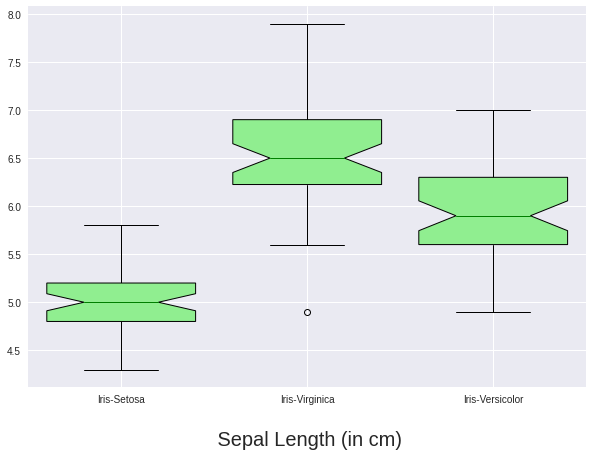

In [104]:
setosa = df.loc[df['Species']=='Iris-setosa', 'SepalLengthCm'].values
virginica = df.loc[df['Species']=='Iris-virginica', 'SepalLengthCm'].values
versicolor = df.loc[df['Species']=='Iris-versicolor', 'SepalLengthCm'].values
fig, axes = plt.subplots(figsize = (10,7))

boxplots=plt.boxplot([setosa, virginica, versicolor], labels= ['Iris-Setosa', 'Iris-Virginica', 'Iris-Versicolor'],
            notch=True, widths= 0.8, patch_artist=True, medianprops=dict(color='Green'));

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('lightgreen')

boxplot2=boxplots['boxes'][1]
boxplot2.set_facecolor('lightgreen')

boxplot3=boxplots['boxes'][2]
boxplot3.set_facecolor('lightgreen')

plt.xlabel('\n Sepal Length (in cm)', fontsize=20);

In [105]:
df['Species'] = df['Species'].replace({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})

In [106]:
species = [['Iris-setosa', 0], ['Iris-virginica', 1], ['Iris-versicolor', 2]]
species_df = pd.DataFrame(species, columns=['Species', 'ID Number'])
species_df

,Species,ID Number
0,Iris-setosa,0
1,Iris-virginica,1
2,Iris-versicolor,2


In [107]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [108]:
#DATA VALIDATION

In [109]:
X = df.drop(columns='Species')
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
X_train.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [112]:
#Initiate Transformers & Import Libraries

In [113]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [114]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent = SimpleImputer(strategy='most_frequent')

In [115]:
#PIEPELINE

In [116]:
num_selector = make_column_selector(dtype_include='number')

In [117]:
numeric_pipeline = make_pipeline(scaler)

In [118]:
numeric_tuple = (numeric_pipeline, num_selector)

In [119]:
#COLUMN TRANSFORMER

In [120]:
preprocessor = make_column_transformer(numeric_tuple, remainder='passthrough')

In [121]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f68aee73f90>)])

In [122]:
x_train_pro = preprocessor.transform(X_train)
x_test_pro = preprocessor.transform(X_test)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
test_pred = rf.predict(X_test)
test_pred

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [126]:
predictions_submission = pd.DataFrame()
predictions_submission['Sepal Length in CM'] = X_test['SepalLengthCm']
predictions_submission['Petal Width in CM']= X_test['PetalLengthCm']
predictions_submission['Sepal Width in CM']= X_test['SepalWidthCm']
predictions_submission['Petal Length in CM']= X_test['PetalWidthCm']
predictions_submission['Type of Flower'] = test_pred
predictions_submission.head()

,Sepal Length in CM,Petal Width in CM,Sepal Width in CM,Petal Length in CM,Type of Flower
73,6.1,4.7,2.8,1.2,2
18,5.7,1.7,3.8,0.3,0
118,7.7,6.9,2.6,2.3,1
78,6.0,4.5,2.9,1.5,2
76,6.8,4.8,2.8,1.4,2


In [127]:
X_test.iloc[0]

SepalLengthCm    6.1
SepalWidthCm     2.8
PetalLengthCm    4.7
PetalWidthCm     1.2
Name: 73, dtype: float64

In [128]:
rf.predict([[2.3, 3.0, 1.2, 0.4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [130]:
logreg = LogisticRegression()

In [131]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [132]:
logreg_predict = logreg.predict(X_test)
logreg_predict

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [133]:
accuracy_score(y_test, logreg_predict)

1.0

In [134]:
print(confusion_matrix(y_test, logreg_predict))

[[15  0  0]
 [ 0 12  0]
 [ 0  0 11]]


In [135]:
print(classification_report(y_test, logreg_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [136]:
species_df

,Species,ID Number
0,Iris-setosa,0
1,Iris-virginica,1
2,Iris-versicolor,2
